In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 첫번째 시도

## 데이터 읽기

In [ ]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 안쓸 컬럼 삭제

In [ ]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 결측치 처리

In [ ]:
all_df = all_df.fillna(0)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  843 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     843 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 전처리 전의 데이터 분포 보기

### time

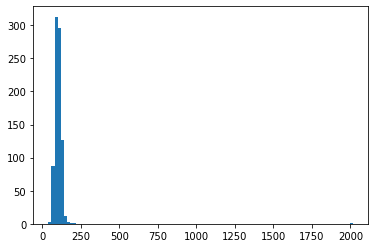

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

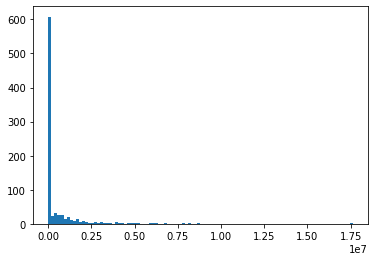

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

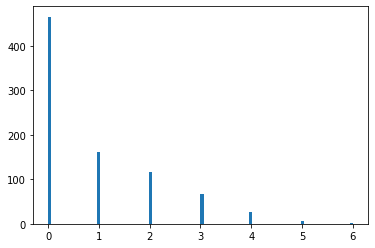

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

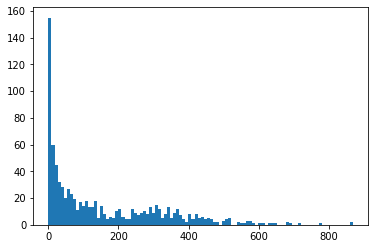

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

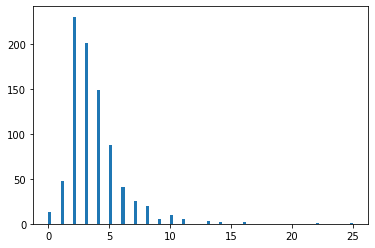

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

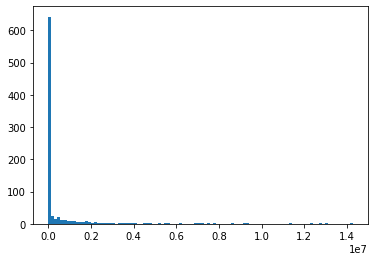

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [ ]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [ ]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [ ]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

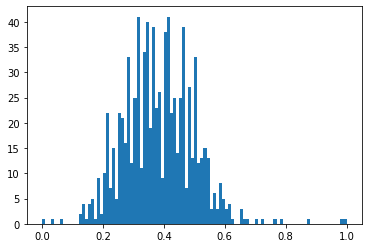

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

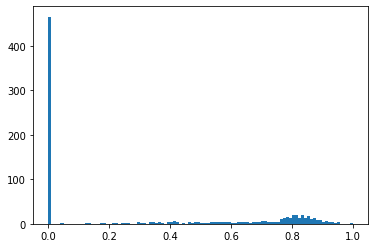

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

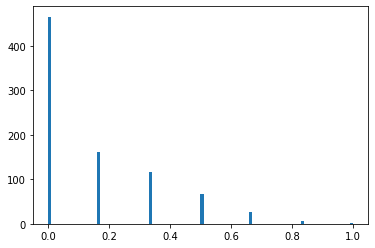

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

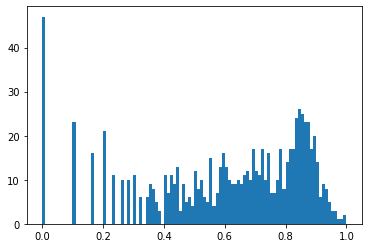

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

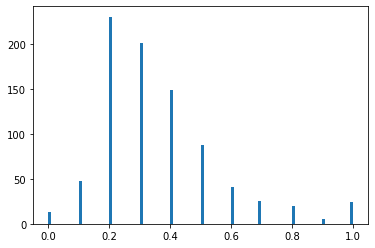

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

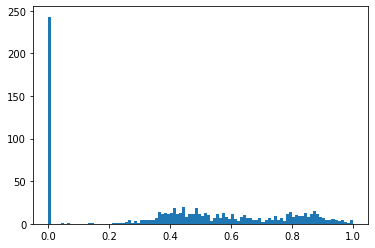

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 5)
(500,)
(100, 5)
(100,)
(243, 5)


## 딥러닝 학습

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                60        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


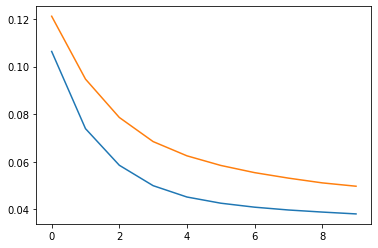

4/4 [==============================] - 0s 3ms/step - loss: 0.0368 - mape: 27.0335
loss= 0.036838240921497345
mape= 27.03354263305664


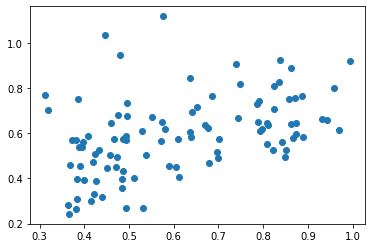

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

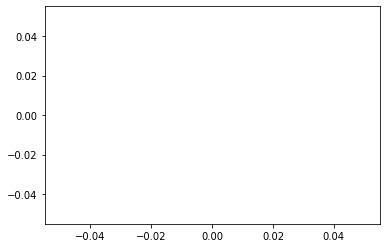

In [ ]:
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()


## RMSE 계산하기

In [ ]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(10313512.0, shape=(), dtype=float32)


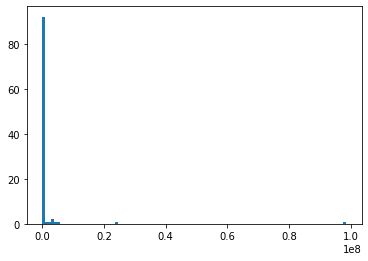

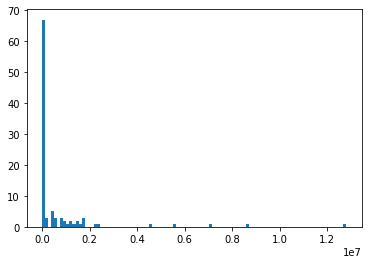

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [ ]:
predicted = model.predict(submission_x)

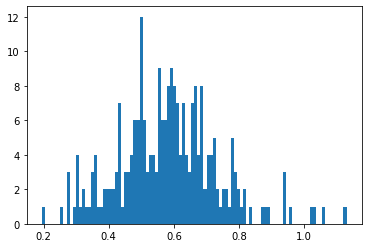

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = predicted * ( y_max - y_min) + y_min

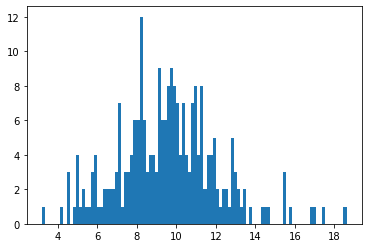

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = np.exp(predicted) - 1.

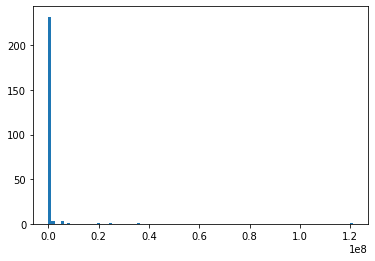

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,112408
아빠가 여자를 좋아해,374216
하모니,931318
의형제,4888732
평행 이론,617907
회오리 바람,7817
경계도시 2,1864
이웃집 남자,2338
아마존의 눈물 극장판,2804


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,20577
1,아빠가 여자를 좋아해,53726
2,하모니,2186849
3,의형제,8965
4,평행 이론,1238


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,20577
아빠가 여자를 좋아해,53726
하모니,2186849
의형제,8965
평행 이론,1238
회오리 바람,11921
경계도시 2,1083
이웃집 남자,157790
아마존의 눈물 극장판,2051


# 두번째 시도

카테고리 데이터도 사용하자.

## 데이터 읽기

In [ ]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 232 entries, title to screening_rat_code_3
dtypes: category(3), float64(2), int64(4), object(3), uint8(220)
memory usage: 262.5+ KB


## 안쓸 컬럼 삭제

In [ ]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 결측치 처리

In [ ]:
all_df = all_df.fillna(0)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 전처리 전의 데이터 분포 보기

### time

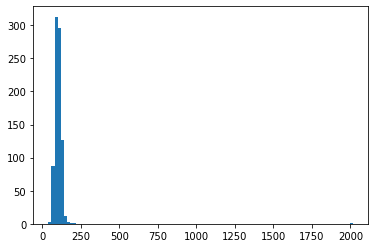

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

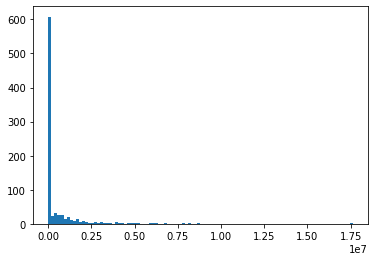

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

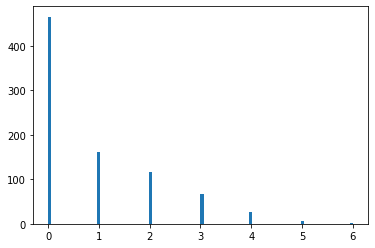

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

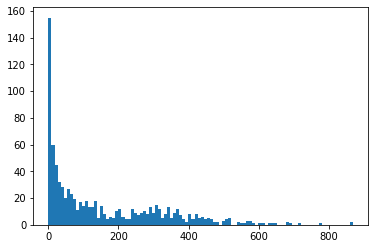

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

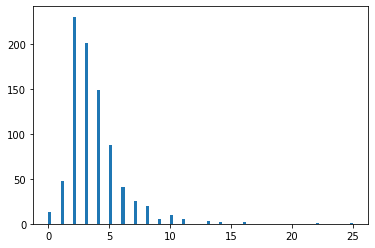

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

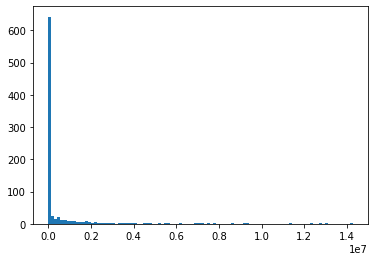

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [ ]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [ ]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [ ]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

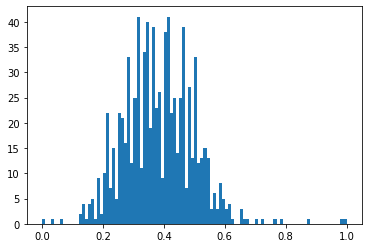

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

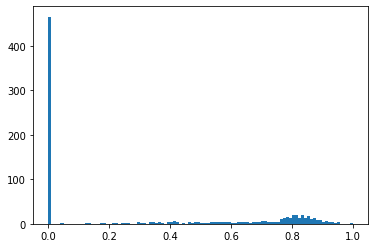

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

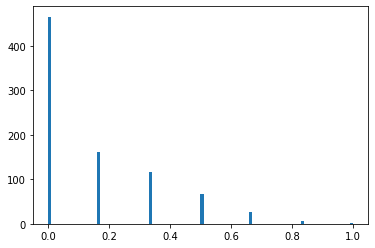

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

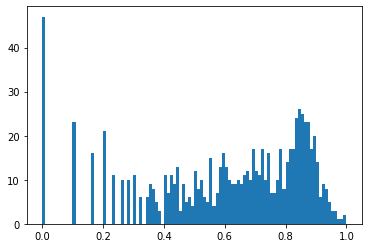

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

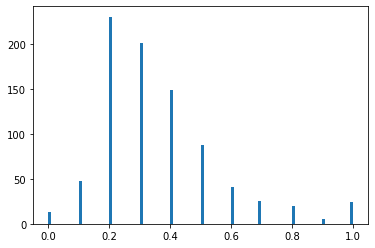

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

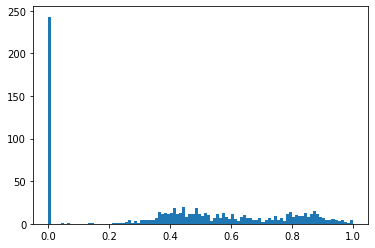

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 225)
(500,)
(100, 225)
(100,)
(243, 225)


## 딥러닝 학습

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                2260      
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


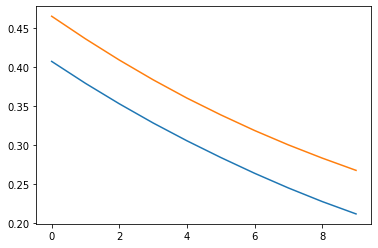

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


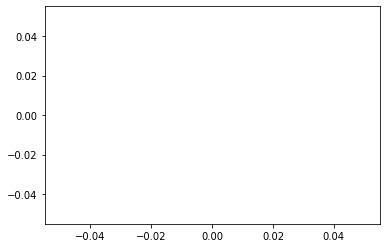

In [ ]:
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.2014 - mape: 60.3689
loss= 0.2013835459947586
mape= 60.368892669677734


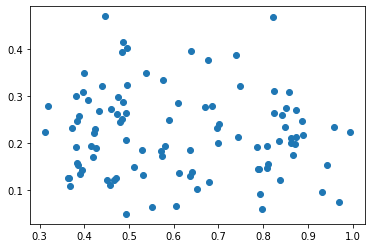

In [ ]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [ ]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1953034.4, shape=(), dtype=float32)


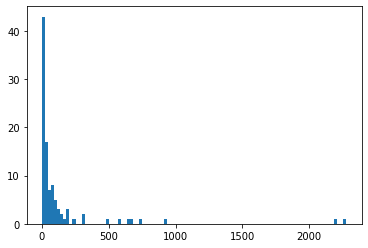

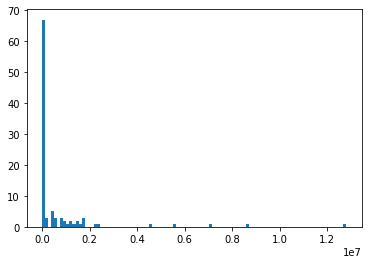

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [ ]:
predicted = model.predict(submission_x)

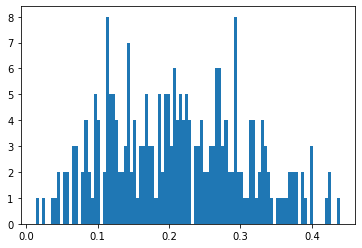

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = predicted * ( y_max - y_min) + y_min

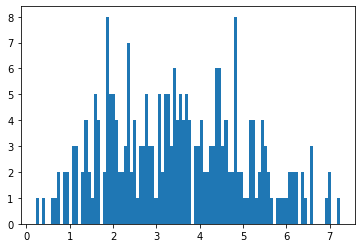

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = np.exp(predicted) - 1.

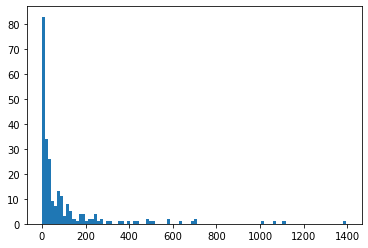

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,20577
아빠가 여자를 좋아해,53726
하모니,2186849
의형제,8965
평행 이론,1238
회오리 바람,11921
경계도시 2,1083
이웃집 남자,157790
아마존의 눈물 극장판,2051


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,20
1,아빠가 여자를 좋아해,0
2,하모니,25
3,의형제,9
4,평행 이론,50


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,20
아빠가 여자를 좋아해,0
하모니,25
의형제,9
평행 이론,50
회오리 바람,126
경계도시 2,137
이웃집 남자,105
아마존의 눈물 극장판,247


## batch_size 찾기

In [ ]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.3401651382446289
32 : 0.2345564365386963
64 : 0.20106101036071777
128 : 0.1851978302001953
256 : 0.17904376983642578
512 : 0.1642768383026123
1024 : 0.1708688735961914
2048 : 0.17656850814819336
4096 : 0.17310237884521484
8192 : 0.17683959007263184


# 세번째 시도

release_time 컬럼 사용

## 데이터 읽기

In [ ]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값 조정

'2021-12-31' 같은 값을 '2021-12'로 변경

In [ ]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 304 entries, title to release_time_code_71
dtypes: category(4), float64(2), int64(4), object(2), uint8(292)
memory usage: 319.0+ KB


## 안쓸 컬럼 삭제

In [ ]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 결측치 처리

In [ ]:
all_df = all_df.fillna(0)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 전처리 전의 데이터 분포 보기

### time

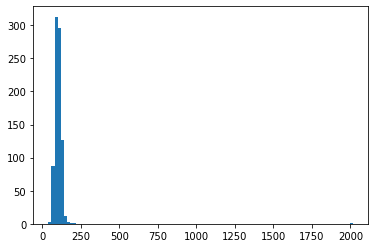

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

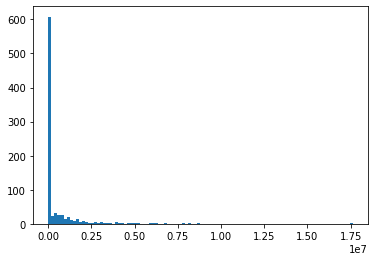

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

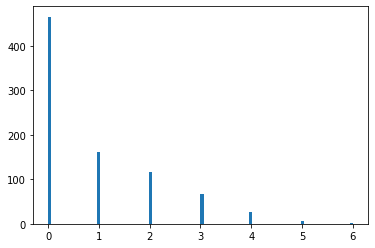

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

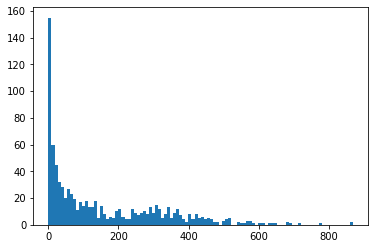

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

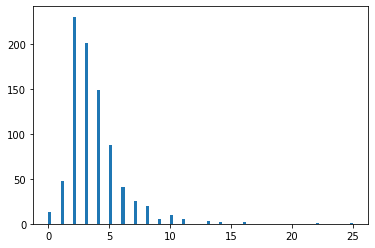

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

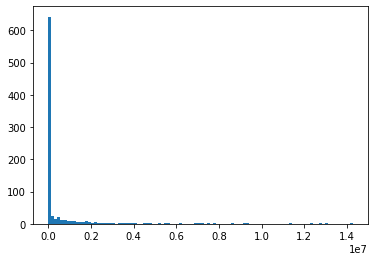

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [ ]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [ ]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [ ]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

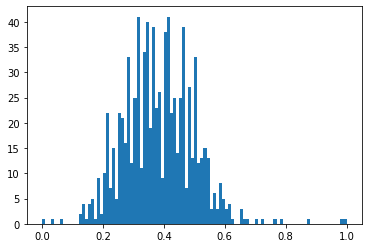

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

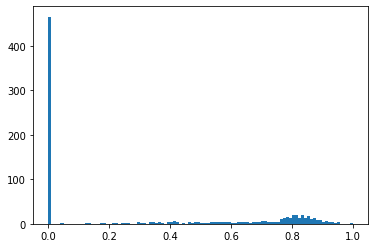

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

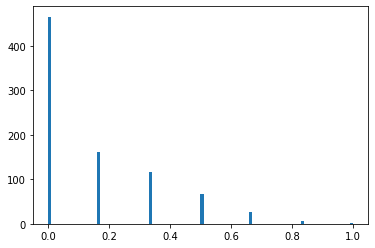

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

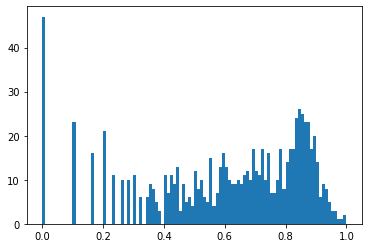

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

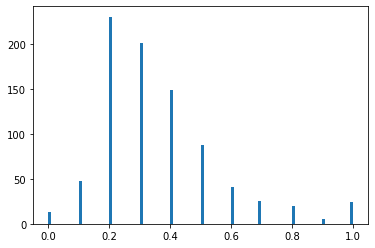

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

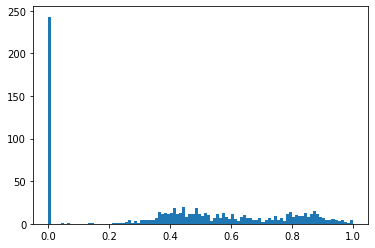

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 297)
(500,)
(100, 297)
(100,)
(243, 297)


## 딥러닝 학습

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 10)                2980      
                                                                 
 dense_76 (Dense)            (None, 10)                110       
                                                                 
 dense_77 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


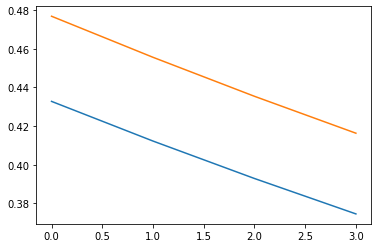

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1*4, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


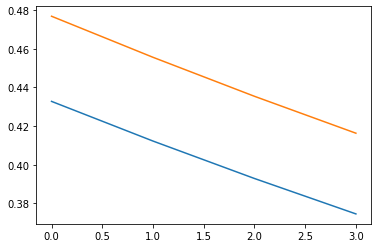

In [ ]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


In [ ]:

history = model.fit(train_x, train_y, epochs=1*4, verbose=0, batch_size=512, validation_split=0.1)


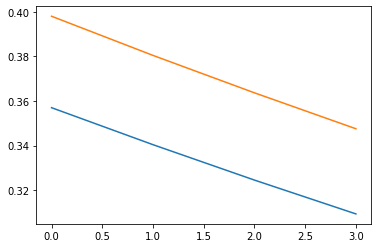

In [ ]:
plt.plot(history.history['loss'][-4000:])
plt.plot(history.history['val_loss'][-4000:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.2978 - mape: 82.2706
loss= 0.2977934181690216
mape= 82.27057647705078


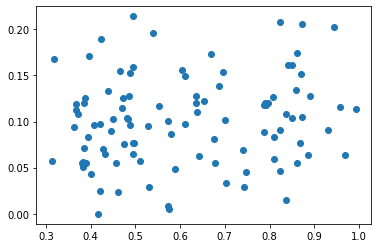

In [ ]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [ ]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1953053.0, shape=(), dtype=float32)


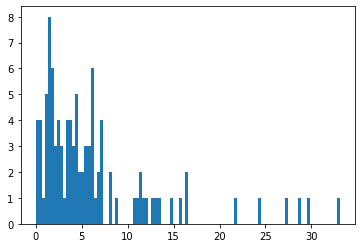

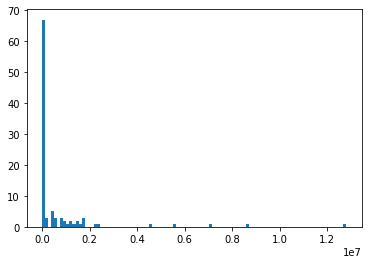

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [ ]:
predicted = model.predict(submission_x)

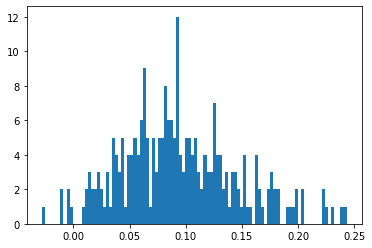

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = predicted * ( y_max - y_min) + y_min

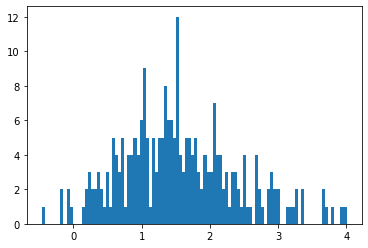

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = np.exp(predicted) - 1.

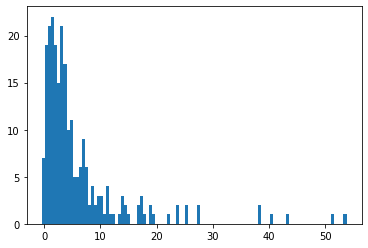

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,20
아빠가 여자를 좋아해,0
하모니,25
의형제,9
평행 이론,50
회오리 바람,126
경계도시 2,137
이웃집 남자,105
아마존의 눈물 극장판,247


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,1
1,아빠가 여자를 좋아해,27
2,하모니,6
3,의형제,40
4,평행 이론,5


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,1
아빠가 여자를 좋아해,27
하모니,6
의형제,40
평행 이론,5
회오리 바람,10
경계도시 2,7
이웃집 남자,4
아마존의 눈물 극장판,7


## batch_size 찾기

In [ ]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.36125922203063965
32 : 0.36343932151794434
64 : 0.20592689514160156
128 : 0.19507408142089844
256 : 0.17405104637145996
512 : 0.17781567573547363
1024 : 0.17123723030090332
2048 : 0.1741626262664795
4096 : 0.16404366493225098
8192 : 0.1538240909576416


# 네번째 시도

director 컬럼 사용, 모델 크기 키우기

## 데이터 읽기

In [ ]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [ ]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값 조정

'2021-12-31' 같은 값을 '2021-12'로 변경

In [ ]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## director 컬럼 카테고리화

In [ ]:
print(len(all_df.director.unique()))
all_df.loc[all_df.dir_prev_num==0, 'director'] = "무명감독"
print(len(all_df.director.unique()))

614
291


## 카테고리 데이터 인코딩

In [ ]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [ ]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])
all_df = pd.get_dummies(all_df, columns = ['director_code'])

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 595 entries, title to director_code_290
dtypes: category(5), float64(2), int64(4), object(1), uint8(583)
memory usage: 565.9+ KB


## 안쓸 컬럼 삭제

In [ ]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 결측치 처리

In [ ]:
all_df = all_df.fillna(0)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 전처리 전의 데이터 분포 보기

### time

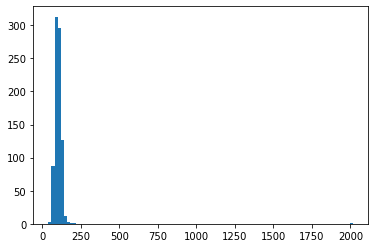

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

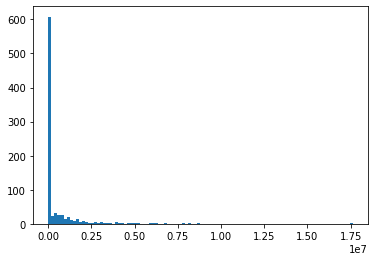

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

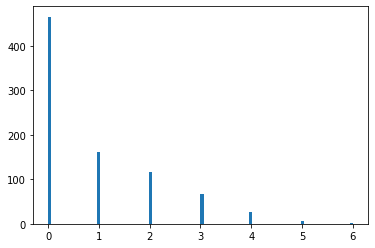

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

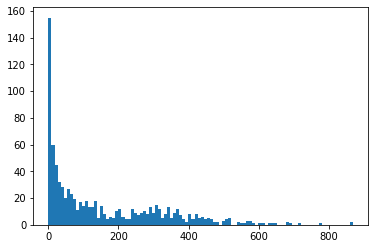

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

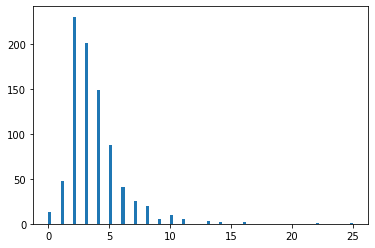

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

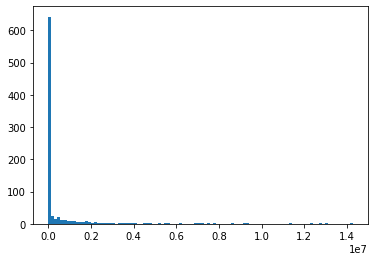

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [ ]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [ ]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [ ]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [ ]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [ ]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [ ]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [ ]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

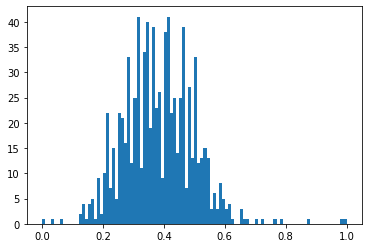

In [ ]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

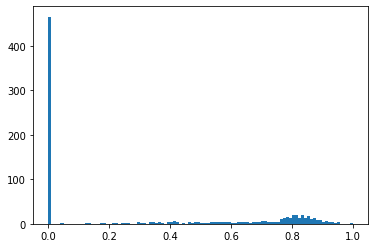

In [ ]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

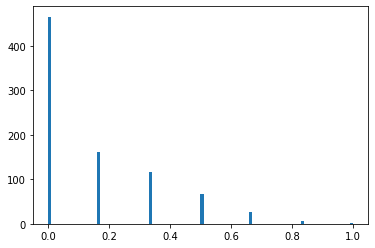

In [ ]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

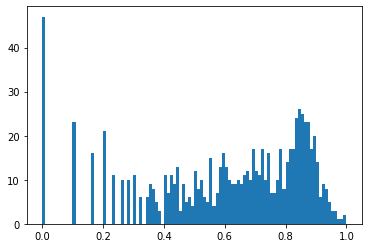

In [ ]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

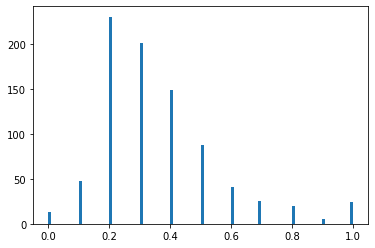

In [ ]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

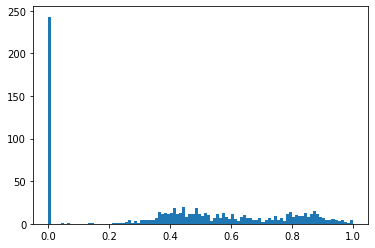

In [ ]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [ ]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [ ]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 588)
(500,)
(100, 588)
(100,)
(243, 588)


## 딥러닝 학습

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 256)               150784    
                                                                 
 dense_88 (Dense)            (None, 10)                2570      
                                                                 
 dense_89 (Dense)            (None, 1)                 11        
                                                                 
Total params: 153,365
Trainable params: 153,365
Non-trainable params: 0
_________________________________________________________________


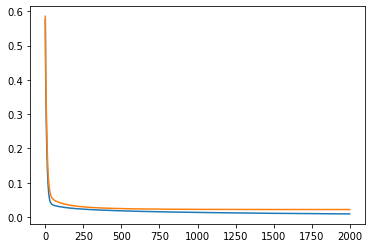

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000*2, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


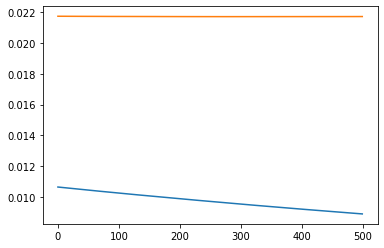

In [ ]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


4/4 [==============================] - 0s 5ms/step - loss: 0.0163 - mape: 17.6844
loss= 0.01632828451693058
mape= 17.684444427490234


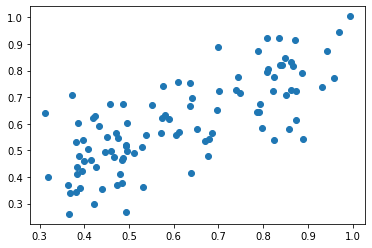

In [ ]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [ ]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1844475.4, shape=(), dtype=float32)


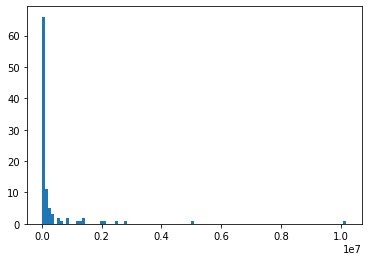

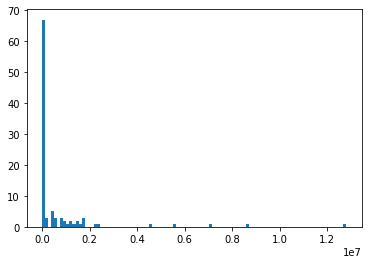

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [ ]:
predicted = model.predict(submission_x)

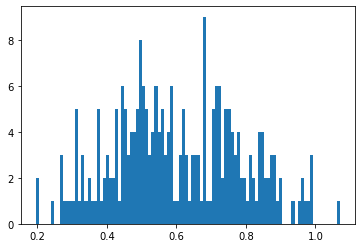

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = predicted * ( y_max - y_min) + y_min

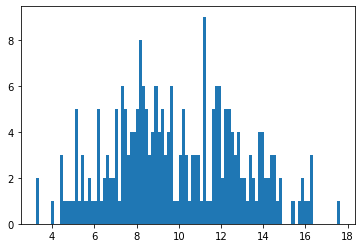

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

In [ ]:
predicted = np.exp(predicted) - 1.

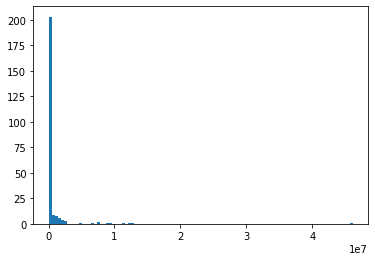

In [ ]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,1
아빠가 여자를 좋아해,27
하모니,6
의형제,40
평행 이론,5
회오리 바람,10
경계도시 2,7
이웃집 남자,4
아마존의 눈물 극장판,7


In [ ]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [ ]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,323723
1,아빠가 여자를 좋아해,257374
2,하모니,555691
3,의형제,2695399
4,평행 이론,75166


In [ ]:
final_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

title,box_off_num
용서는 없다,323723
아빠가 여자를 좋아해,257374
하모니,555691
의형제,2695399
평행 이론,75166
회오리 바람,4117
경계도시 2,1184
이웃집 남자,1994
아마존의 눈물 극장판,27335


## batch_size 찾기

In [ ]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.6797473430633545
32 : 0.23438525199890137
64 : 0.19760417938232422
128 : 0.2018420696258545
256 : 0.18110084533691406
512 : 0.18398118019104004
1024 : 0.16964054107666016
2048 : 0.17979955673217773
4096 : 0.1659085750579834
8192 : 0.17085051536560059
